## GAN 50 sqr

This notebook is modified from the keras repository: https://github.com/BAI-Yeqi/Keras-GAN/blob/master/gan/gan.py

As tested (256, 256) is too big a input, so we are using (50, 50)


In [5]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

Using TensorFlow backend.


In [6]:
X_try = np.load("drive/Colab Notebooks/Data/ChestX_8/50sqr/image_array_batch_0.npy")
X_try.shape

(2000, 50, 50)

The Training Set of MNIST got the shape 

```
(60000, 28, 28)
```



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1500)              3751500   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               384256    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 4,136,013
Trainable params: 4,136,013
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:973: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.935480, acc.: 25.00%] [G loss: 1.064088]
shape of noise: (25, 400)
1 [D loss: 0.193995, acc.: 96.88%] [G loss: 1.215414]
2 [D loss: 0.131188, acc.: 100.00%] [G loss: 1.759661]
3 [D loss: 0.114016, acc.: 100.00%] [G loss: 2.413901]
4 [D loss: 0.058506, acc.: 100.00%] [G loss: 2.814676]
5 [D loss: 0.050716, acc.: 100.00%] [G loss: 3.004538]
6 [D loss: 0.025170, acc.: 100.00%] [G loss: 3.143888]
7 [D loss: 0.044841, acc.: 100.00%] [G loss: 3.327182]
8 [D loss: 0.042580, acc.: 100.00%] [G loss: 3.443645]
9 [D loss: 0.051892, acc.: 100.00%] [G loss: 3.685645]
10 [D loss: 0.033969, acc.: 100.00%] [G loss: 3.765005]
11 [D loss: 0.012805, acc.: 100.00%] [G loss: 3.643853]
12 [D loss: 0.023989, acc.: 100.00%] [G loss: 3.798018]
13 [D loss: 0.019777, acc.: 100.00%] [G loss: 3.744090]
14 [D loss: 0.039992, acc.: 96.88%] [G loss: 3.726820]
15 [D loss: 0.020030, acc.: 100.00%] [G loss: 3.953675]
16 [D loss: 0.035571, acc.: 100.00%] [G loss: 4.144857]
17 [D loss: 0.020486, acc.: 100.00%

130 [D loss: 0.671431, acc.: 87.50%] [G loss: 7.394536]
131 [D loss: 0.196221, acc.: 90.62%] [G loss: 7.949601]
132 [D loss: 0.383054, acc.: 78.12%] [G loss: 8.794392]
133 [D loss: 0.323304, acc.: 90.62%] [G loss: 9.048930]
134 [D loss: 0.483009, acc.: 75.00%] [G loss: 7.602731]
135 [D loss: 0.823773, acc.: 59.38%] [G loss: 8.947613]
136 [D loss: 0.648989, acc.: 71.88%] [G loss: 8.527021]
137 [D loss: 0.224909, acc.: 96.88%] [G loss: 8.014524]
138 [D loss: 0.412903, acc.: 75.00%] [G loss: 8.316612]
139 [D loss: 0.203119, acc.: 96.88%] [G loss: 7.233335]
140 [D loss: 0.380559, acc.: 87.50%] [G loss: 8.871067]
141 [D loss: 0.437828, acc.: 78.12%] [G loss: 7.791859]
142 [D loss: 0.320843, acc.: 87.50%] [G loss: 8.315121]
143 [D loss: 0.263413, acc.: 90.62%] [G loss: 9.759400]
144 [D loss: 0.502717, acc.: 81.25%] [G loss: 9.027807]
145 [D loss: 0.262601, acc.: 90.62%] [G loss: 8.534868]
146 [D loss: 0.460348, acc.: 81.25%] [G loss: 9.024223]
147 [D loss: 0.228058, acc.: 93.75%] [G loss: 8.

250 [D loss: 0.661673, acc.: 65.62%] [G loss: 6.546351]
251 [D loss: 0.315797, acc.: 90.62%] [G loss: 6.786239]
252 [D loss: 0.521864, acc.: 78.12%] [G loss: 7.479691]
253 [D loss: 0.754831, acc.: 62.50%] [G loss: 5.735383]
254 [D loss: 0.231449, acc.: 93.75%] [G loss: 5.714876]
255 [D loss: 0.379694, acc.: 81.25%] [G loss: 6.756502]
256 [D loss: 0.351097, acc.: 84.38%] [G loss: 7.494617]
257 [D loss: 0.275893, acc.: 84.38%] [G loss: 6.713979]
258 [D loss: 0.583158, acc.: 71.88%] [G loss: 6.620555]
259 [D loss: 0.339849, acc.: 84.38%] [G loss: 7.590895]
260 [D loss: 0.680122, acc.: 68.75%] [G loss: 5.048941]
261 [D loss: 0.299512, acc.: 84.38%] [G loss: 6.817851]
262 [D loss: 0.508627, acc.: 75.00%] [G loss: 7.226344]
263 [D loss: 0.372171, acc.: 81.25%] [G loss: 6.496773]
264 [D loss: 0.555218, acc.: 65.62%] [G loss: 6.520524]
265 [D loss: 0.706703, acc.: 59.38%] [G loss: 7.166726]
266 [D loss: 0.431333, acc.: 78.12%] [G loss: 6.216768]
267 [D loss: 0.203621, acc.: 90.62%] [G loss: 6.

372 [D loss: 0.295526, acc.: 93.75%] [G loss: 6.511125]
373 [D loss: 0.259872, acc.: 93.75%] [G loss: 5.952623]
374 [D loss: 0.291272, acc.: 90.62%] [G loss: 6.146069]
375 [D loss: 1.022403, acc.: 46.88%] [G loss: 7.097687]
376 [D loss: 0.456168, acc.: 75.00%] [G loss: 6.112625]
377 [D loss: 0.505723, acc.: 65.62%] [G loss: 5.346864]
378 [D loss: 0.317071, acc.: 81.25%] [G loss: 5.605175]
379 [D loss: 0.469878, acc.: 81.25%] [G loss: 5.946051]
380 [D loss: 0.273311, acc.: 87.50%] [G loss: 5.595172]
381 [D loss: 0.473625, acc.: 78.12%] [G loss: 5.748828]
382 [D loss: 0.228663, acc.: 100.00%] [G loss: 6.739235]
383 [D loss: 0.268189, acc.: 93.75%] [G loss: 5.732159]
384 [D loss: 0.579589, acc.: 65.62%] [G loss: 6.793532]
385 [D loss: 0.359103, acc.: 93.75%] [G loss: 5.724460]
386 [D loss: 0.347435, acc.: 87.50%] [G loss: 5.501985]
387 [D loss: 0.275738, acc.: 90.62%] [G loss: 6.640136]
388 [D loss: 0.643442, acc.: 75.00%] [G loss: 6.992880]
389 [D loss: 0.539686, acc.: 59.38%] [G loss: 4

500 [D loss: 0.479302, acc.: 78.12%] [G loss: 4.099649]
501 [D loss: 0.208641, acc.: 93.75%] [G loss: 4.454832]
502 [D loss: 0.647309, acc.: 62.50%] [G loss: 6.626773]
503 [D loss: 0.361860, acc.: 78.12%] [G loss: 6.248240]
504 [D loss: 0.157525, acc.: 93.75%] [G loss: 5.351697]
505 [D loss: 0.437487, acc.: 75.00%] [G loss: 4.521995]
506 [D loss: 0.456380, acc.: 75.00%] [G loss: 5.873093]
507 [D loss: 0.433253, acc.: 78.12%] [G loss: 5.218225]
508 [D loss: 0.332874, acc.: 90.62%] [G loss: 4.312525]
509 [D loss: 0.192602, acc.: 90.62%] [G loss: 5.583538]
510 [D loss: 0.321122, acc.: 84.38%] [G loss: 4.455305]
511 [D loss: 0.243277, acc.: 87.50%] [G loss: 4.900521]
512 [D loss: 0.210300, acc.: 93.75%] [G loss: 5.910901]
513 [D loss: 0.372537, acc.: 81.25%] [G loss: 4.094633]
514 [D loss: 0.494437, acc.: 81.25%] [G loss: 5.628081]
515 [D loss: 0.217085, acc.: 90.62%] [G loss: 5.094393]
516 [D loss: 0.238134, acc.: 93.75%] [G loss: 4.755126]
517 [D loss: 0.214247, acc.: 90.62%] [G loss: 4.

621 [D loss: 0.281386, acc.: 90.62%] [G loss: 5.046248]
622 [D loss: 0.294586, acc.: 93.75%] [G loss: 5.199493]
623 [D loss: 0.356477, acc.: 78.12%] [G loss: 4.355774]
624 [D loss: 0.135619, acc.: 96.88%] [G loss: 4.902226]
625 [D loss: 0.214682, acc.: 90.62%] [G loss: 4.383543]
626 [D loss: 0.256993, acc.: 100.00%] [G loss: 4.619586]
627 [D loss: 0.187358, acc.: 96.88%] [G loss: 6.119840]
628 [D loss: 0.194438, acc.: 96.88%] [G loss: 4.490534]
629 [D loss: 0.240903, acc.: 87.50%] [G loss: 5.049071]
630 [D loss: 0.162708, acc.: 96.88%] [G loss: 4.167266]
631 [D loss: 0.212675, acc.: 96.88%] [G loss: 6.450269]
632 [D loss: 0.566995, acc.: 78.12%] [G loss: 3.315011]
633 [D loss: 0.438603, acc.: 78.12%] [G loss: 8.156878]
634 [D loss: 0.392120, acc.: 78.12%] [G loss: 5.329424]
635 [D loss: 0.211169, acc.: 96.88%] [G loss: 4.857525]
636 [D loss: 0.186419, acc.: 96.88%] [G loss: 5.797056]
637 [D loss: 0.335874, acc.: 81.25%] [G loss: 4.310243]
638 [D loss: 0.213532, acc.: 90.62%] [G loss: 5

747 [D loss: 0.259622, acc.: 93.75%] [G loss: 5.030642]
748 [D loss: 0.242076, acc.: 93.75%] [G loss: 5.173113]
749 [D loss: 0.175429, acc.: 100.00%] [G loss: 4.356145]
750 [D loss: 0.318468, acc.: 87.50%] [G loss: 5.916042]
751 [D loss: 0.250839, acc.: 93.75%] [G loss: 3.691422]
752 [D loss: 0.106044, acc.: 100.00%] [G loss: 3.347988]
753 [D loss: 0.367131, acc.: 87.50%] [G loss: 9.067905]
754 [D loss: 1.784694, acc.: 21.88%] [G loss: 5.330998]
755 [D loss: 0.133316, acc.: 96.88%] [G loss: 6.731079]
756 [D loss: 1.482172, acc.: 43.75%] [G loss: 7.980946]
757 [D loss: 0.297359, acc.: 84.38%] [G loss: 8.006258]
758 [D loss: 0.535446, acc.: 78.12%] [G loss: 5.474855]
759 [D loss: 0.399803, acc.: 81.25%] [G loss: 4.688245]
760 [D loss: 0.185192, acc.: 93.75%] [G loss: 5.209940]
761 [D loss: 0.237514, acc.: 87.50%] [G loss: 3.692993]
762 [D loss: 0.239965, acc.: 90.62%] [G loss: 5.911198]
763 [D loss: 0.299060, acc.: 90.62%] [G loss: 3.857213]
764 [D loss: 0.311740, acc.: 84.38%] [G loss: 

876 [D loss: 0.397937, acc.: 78.12%] [G loss: 6.405085]
877 [D loss: 0.512853, acc.: 75.00%] [G loss: 4.540124]
878 [D loss: 0.313305, acc.: 81.25%] [G loss: 7.643486]
879 [D loss: 0.780534, acc.: 62.50%] [G loss: 4.429280]
880 [D loss: 0.219678, acc.: 90.62%] [G loss: 4.794851]
881 [D loss: 0.566755, acc.: 78.12%] [G loss: 3.924714]
882 [D loss: 0.224188, acc.: 87.50%] [G loss: 5.926858]
883 [D loss: 0.099705, acc.: 100.00%] [G loss: 5.546867]
884 [D loss: 0.108586, acc.: 100.00%] [G loss: 3.219399]
885 [D loss: 0.253402, acc.: 90.62%] [G loss: 5.387325]
886 [D loss: 0.300503, acc.: 90.62%] [G loss: 6.131802]
887 [D loss: 0.194819, acc.: 93.75%] [G loss: 4.046323]
888 [D loss: 0.222536, acc.: 90.62%] [G loss: 4.729568]
889 [D loss: 0.139803, acc.: 100.00%] [G loss: 4.384137]
890 [D loss: 0.348417, acc.: 84.38%] [G loss: 5.004898]
891 [D loss: 0.208789, acc.: 96.88%] [G loss: 7.415742]
892 [D loss: 0.816463, acc.: 56.25%] [G loss: 4.943543]
893 [D loss: 0.254449, acc.: 84.38%] [G loss:

1000 [D loss: 0.060277, acc.: 100.00%] [G loss: 6.292121]
shape of noise: (25, 400)
1001 [D loss: 0.159028, acc.: 93.75%] [G loss: 4.878573]
1002 [D loss: 0.124482, acc.: 96.88%] [G loss: 3.459075]
1003 [D loss: 0.118379, acc.: 96.88%] [G loss: 6.617228]
1004 [D loss: 0.429714, acc.: 78.12%] [G loss: 4.383999]
1005 [D loss: 0.242112, acc.: 93.75%] [G loss: 7.478267]
1006 [D loss: 0.533392, acc.: 65.62%] [G loss: 4.893798]
1007 [D loss: 0.055608, acc.: 100.00%] [G loss: 6.580555]
1008 [D loss: 0.272858, acc.: 93.75%] [G loss: 5.632656]
1009 [D loss: 0.102738, acc.: 100.00%] [G loss: 5.853979]
1010 [D loss: 0.106469, acc.: 96.88%] [G loss: 6.909986]
1011 [D loss: 0.161507, acc.: 93.75%] [G loss: 5.244855]
1012 [D loss: 0.095369, acc.: 100.00%] [G loss: 5.605877]
1013 [D loss: 0.134041, acc.: 96.88%] [G loss: 5.209774]
1014 [D loss: 0.137843, acc.: 100.00%] [G loss: 6.439901]
1015 [D loss: 0.123352, acc.: 96.88%] [G loss: 5.606377]
1016 [D loss: 0.080202, acc.: 100.00%] [G loss: 5.664603]

1123 [D loss: 0.365430, acc.: 78.12%] [G loss: 5.058955]
1124 [D loss: 0.124407, acc.: 96.88%] [G loss: 7.085811]
1125 [D loss: 0.268420, acc.: 90.62%] [G loss: 5.059680]
1126 [D loss: 0.105666, acc.: 96.88%] [G loss: 5.403279]
1127 [D loss: 0.137072, acc.: 100.00%] [G loss: 5.776808]
1128 [D loss: 0.114921, acc.: 100.00%] [G loss: 6.067011]
1129 [D loss: 0.130410, acc.: 96.88%] [G loss: 5.824060]
1130 [D loss: 0.170429, acc.: 93.75%] [G loss: 3.469636]
1131 [D loss: 0.065618, acc.: 100.00%] [G loss: 5.180165]
1132 [D loss: 0.178360, acc.: 93.75%] [G loss: 4.651995]
1133 [D loss: 0.123760, acc.: 96.88%] [G loss: 6.971199]
1134 [D loss: 0.565218, acc.: 65.62%] [G loss: 9.313641]
1135 [D loss: 1.300732, acc.: 56.25%] [G loss: 4.803344]
1136 [D loss: 0.077962, acc.: 96.88%] [G loss: 5.524036]
1137 [D loss: 0.274935, acc.: 87.50%] [G loss: 5.217288]
1138 [D loss: 0.081731, acc.: 96.88%] [G loss: 6.426764]
1139 [D loss: 0.219270, acc.: 87.50%] [G loss: 5.124673]
1140 [D loss: 0.228701, acc.

1245 [D loss: 0.154668, acc.: 96.88%] [G loss: 7.293752]
1246 [D loss: 0.283109, acc.: 84.38%] [G loss: 6.028749]
1247 [D loss: 0.575663, acc.: 71.88%] [G loss: 7.964349]
1248 [D loss: 0.265281, acc.: 87.50%] [G loss: 4.582963]
1249 [D loss: 0.177761, acc.: 93.75%] [G loss: 6.506531]
1250 [D loss: 0.122993, acc.: 96.88%] [G loss: 6.204683]
1251 [D loss: 0.111234, acc.: 100.00%] [G loss: 5.290910]
1252 [D loss: 0.083494, acc.: 100.00%] [G loss: 5.483278]
1253 [D loss: 0.367781, acc.: 75.00%] [G loss: 6.885003]
1254 [D loss: 0.687601, acc.: 59.38%] [G loss: 5.816305]
1255 [D loss: 0.116662, acc.: 100.00%] [G loss: 7.448287]
1256 [D loss: 0.235899, acc.: 87.50%] [G loss: 6.022878]
1257 [D loss: 0.161940, acc.: 93.75%] [G loss: 7.774593]
1258 [D loss: 0.106426, acc.: 100.00%] [G loss: 6.875962]
1259 [D loss: 0.105783, acc.: 100.00%] [G loss: 4.165388]
1260 [D loss: 0.229327, acc.: 90.62%] [G loss: 8.217854]
1261 [D loss: 0.363412, acc.: 75.00%] [G loss: 4.131817]
1262 [D loss: 0.619361, ac

1369 [D loss: 0.360973, acc.: 81.25%] [G loss: 5.907159]
1370 [D loss: 0.076578, acc.: 96.88%] [G loss: 7.363136]
1371 [D loss: 0.062841, acc.: 100.00%] [G loss: 5.466801]
1372 [D loss: 0.349691, acc.: 87.50%] [G loss: 7.505753]
1373 [D loss: 0.357450, acc.: 84.38%] [G loss: 5.522984]
1374 [D loss: 0.186793, acc.: 96.88%] [G loss: 5.554681]
1375 [D loss: 0.122918, acc.: 100.00%] [G loss: 5.704420]
1376 [D loss: 0.214520, acc.: 96.88%] [G loss: 5.185291]
1377 [D loss: 0.173663, acc.: 90.62%] [G loss: 7.218335]
1378 [D loss: 0.909288, acc.: 62.50%] [G loss: 4.613160]
1379 [D loss: 0.452775, acc.: 81.25%] [G loss: 5.694993]
1380 [D loss: 0.508130, acc.: 75.00%] [G loss: 5.625362]
1381 [D loss: 0.117788, acc.: 96.88%] [G loss: 4.502522]
1382 [D loss: 0.177466, acc.: 93.75%] [G loss: 5.762394]
1383 [D loss: 0.091619, acc.: 100.00%] [G loss: 5.380926]
1384 [D loss: 0.364234, acc.: 78.12%] [G loss: 5.417169]
1385 [D loss: 0.354911, acc.: 87.50%] [G loss: 5.405991]
1386 [D loss: 0.366895, acc.

KeyboardInterrupt: ignored

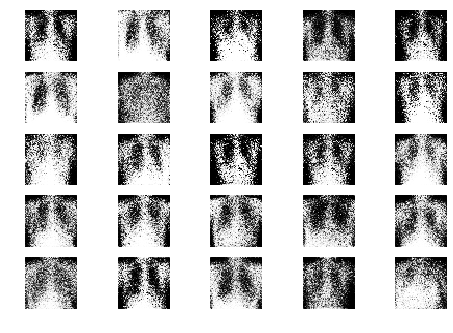

In [7]:
class GAN():
    def __init__(self):
        self.img_rows = 50 
        self.img_cols = 50
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', 
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build and compile the generator
        self.generator = self.build_generator()
        self.generator.compile(loss='binary_crossentropy', optimizer=optimizer)

        # The generator takes noise as input and generated imgs
        z = Input(shape=(400,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The valid takes generated images as input and determines validity
        valid = self.discriminator(img)

        # The combined model  (stacked generator and discriminator) takes
        # noise as input => generates images => determines validity 
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):

        noise_shape = (400,)
        
        model = Sequential()

        model.add(Dense(1024, input_shape=noise_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        
        model.add(Dense(2000, input_shape=noise_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        
        # model.add(Dense(4000))
        # model.add(LeakyReLU(alpha=0.2))
        # model.add(BatchNormalization(momentum=0.8))
        
        model.add(Dense(2500))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        model.summary()

        noise = Input(shape=noise_shape)
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        img_shape = (self.img_rows, self.img_cols, self.channels)
        
        model = Sequential()

        model.add(Flatten(input_shape=img_shape))
        # model.add(Dense(3000))
        # model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1500))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, save_interval=50):

        # Load the dataset
        # (X_train, _), (_, _) = mnist.load_data()
        X_train = np.load("drive/Colab Notebooks/Data/ChestX_8/50sqr/image_array_batch_0.npy")
        
        # Rescale -1 to 1
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = np.expand_dims(X_train, axis=3)

        half_batch = int(batch_size / 2)

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], half_batch)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (half_batch, 400))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, np.ones((half_batch, 1)))
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, np.zeros((half_batch, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)


            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, 400))

            # The generator wants the discriminator to label the generated samples
            # as valid (ones)
            valid_y = np.array([1] * batch_size)

            # Train the generator
            g_loss = self.combined.train_on_batch(noise, valid_y)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)

    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, 400))
        print("shape of noise: "+ str(noise.shape))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("drive/Colab Notebooks/GAN Medical Image/Images Gen/Images GAN FirApt2/mnist_%d.png" % epoch)
        plt.close()


if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=30000, batch_size=32, save_interval=200)

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [3]:
!mkdir -p drive
!google-drive-ocamlfuse drive
!pip install -q keras

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9568213773153525032, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11297803469
 locality {
   bus_id: 1
 }
 incarnation: 584541134691981216
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]